# LUME-EBLT devel

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from eblt.input import EBLTInput, assign_names_to_elements
from eblt.output import EBLTOutput
from eblt.plot import plot_lattice_lines

import numpy as np

from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.units import mec2
import rich
import matplotlib.pyplot as plt

# Load input file

In [5]:
input = EBLTInput.from_file("example1/eblt.in")
assign_names_to_elements(input.lattice_lines)

# View input

In [6]:
rich.print(input)

EBLTInput(
    parameters=Parameters(
        np=1024,
        nz=128,
        zmin=-0.002981592,
        zmax=0.002211398,
        flagfwd=1,
        flagdist=200,
        Iavg=0.13,
        Ek=92706472.0,
        mass=511005.0,
        charge=-1.0,
        freq=1300000000.0
    ),
    phase_space_coefficients=PhaseSpaceCoefficients(coefficients=[1.0, 0.0, 0.0]),
    current_coefficients=Icoefficients(coefficients=[0.0, 0.0, 0.0]),
    lattice_lines=[
        ChangeEnergy(energy_increment=5462800.0, name='changeenergy1'),
        DriftTube(length=74.9744159418, beam_radius=0.0003, name='drifttube1'),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=1.0, name='wakefield1'),
        RFCavity(
            length=16.603888,
            beam_radius=0.0003,
            gradient=10907447.83,
            frequency=1300000000.0,
            phase_deg=-17.43982832,
            name='rfcavity1'
        ),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=-1.0, name='wakefield2'),
        DriftTube(length=8.5305163742, beam_radius=0.0003, name='drifttube2'),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=42.0, switch=1.0, name='wakefield3'),
        RFCavity(
            length=5.5346304,
            beam_radius=0.0003,
            gradient=9053035.459,
            frequency=3900000000.0,
            phase_deg=-148.9681881,
            name='rfcavity2'
        ),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=42.0, switch=-1.0, name='wakefield4'),
        DriftTube(length=12.518616788, beam_radius=0.0003, name='drifttube3'),
        DriftTube(length=7.256313209, beam_radius=0.0003, name='drifttube4'),
        Chicane(
            length=0.203558243263,
            beam_radius=0.0003,
            drift_length=2.44781923989,
            angle=2.01,
            R56=-0.079148634163993,
            T566=0.105531512218657,
            U5666=0.09962502193,
            CSR_switch=0.0,
            SC_switch=None,
            name='chicane1'
        ),
        WriteBeam(iwrite=210, sample=1024, name='writebeam1'),
        DriftTube(length=50.497160326, beam_radius=0.0002, name='drifttube5'),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=1.0, name='wakefield5'),
        RFCavity(
            length=99.623328,
            beam_radius=0.0002,
            gradient=14884059.27,
            frequency=1300000000.0,
            phase_deg=-20.75395814,
            name='rfcavity3'
        ),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=-1.0, name='wakefield6'),
        DriftTube(length=53.693543574, beam_radius=0.0002, name='drifttube6'),
        DriftTube(length=23.684874436, beam_radius=0.0002, name='drifttube7'),
        Chicane(
            length=0.549165215621,
            beam_radius=0.0002,
            drift_length=9.86910678674,
            angle=2.01,
            R56=-0.059542132248146,
            T566=0.0793895096641947,
            U5666=0.05588589286,
            CSR_switch=0.0,
            SC_switch=None,
            name='chicane2'
        ),
        DriftTube(length=34.162976438, beam_radius=0.0002, name='drifttube8'),
        WriteBeam(iwrite=212, sample=1024, name='writebeam2'),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=1.0, name='wakefield7'),
        RFCavity(
            length=166.038878,
            beam_radius=0.0002,
            gradient=15300378.91,
            frequency=1300000000.0,
            phase_deg=0.07099703584,
            name='rfcavity4'
        ),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=-1.0, name='wakefield8'),
        DriftTube(length=100.187336314, beam_radius=0.0002, name='drifttube9'),
        DriftTube(length=193.468002, beam_radius=0.0002, name='drifttube10'),
        Wakefield(length=0.0, multiplier=24.0, wake_function_file_id=46.0, switch=1.0, name='wakefie

# Plot lattice

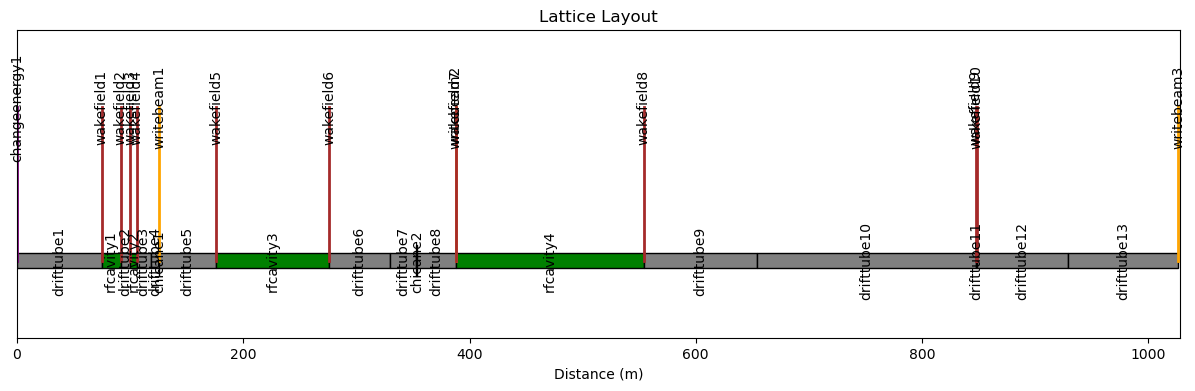

In [7]:
plot_lattice_lines(input.lattice_lines)

# Write input for testing

TODO: parsing rfdata, pts.in

In [6]:
input.to_file("test/eblt.in")

NameError: name 'os' is not defined

In [8]:
import shutil
import glob
import os

# Define the source and destination folders
source_folder = '../example1'
destination_folder = './'

# Use glob to find all files that match the pattern
pattern = os.path.join(source_folder, 'pts.in')  # Files starting with 'xx'
files = glob.glob(pattern)

# Loop through and copy each file
for file in files:
    shutil.copy(file, destination_folder)
#shutil.copyfile(src, dst)
#os.chdir('./test')
#os.system('cp ../example1/rfdata* . ')
#os.system('cp ../example1/pts.in .')
#!cd ./test;cp ../example1/rfdata* .;cp ../example1/pts.in .;

os.getcwd()

'C:\\Users\\yingb\\PycharmProjects\\lume-eblt\\docs\\examples'

# Run manually

In [9]:
os.environ["EBLT_EXE"] = r"G:\My Drive\Stanford\research\FEL\EBLT\xeblt"

In [10]:
!cd test;$EBLT_EXE >log.txt;head log.txt;tail log.txt

The system cannot find the path specified.


# Load output

In [ ]:
output = EBLTOutput.from_directory("test")
output.stats.model_fields.keys()

In [ ]:
output.stats.model_fields

In [ ]:
fig, ax = plt.subplots()
ax.plot(output.stats.distance, output.stats.kinetic_energy / 1e6, color="red")
ax.set_xlabel(r"$s$ (m)")
ax.set_ylabel(r"$E_\text{kinetic}$ (MeV)")
ax.set_ylim(0, None)

In [ ]:
fig, ax = plt.subplots()
ax.plot(output.stats.distance, output.stats.rms_z * 1e3, color="blue")
ax.set_xlabel(r"$s$ (m)")
ax.set_ylabel(r"$\sigma_z$ (mm)")
ax.set_ylim(0, None)

# Particles 

In [ ]:
p = output.particle_distributions[201]
plt.scatter(p.z, p.delta_gamma)

In [ ]:
def particlegroup_data_from_eblt(p):
    z = p.z
    gamma = p.gamma
    weight = p.weight
    n = len(z)
    pz = np.sqrt(gamma**2 - 1) * mec2
    return dict(
        t=np.zeros(n),
        x=np.zeros(n),
        px=np.zeros(n),
        y=np.zeros(n),
        py=np.zeros(n),
        z=p.z,
        pz=pz,
        weight=weight,
        status=np.ones(n),
        species="electron",
    )


P = ParticleGroup(data=particlegroup_data_from_eblt(p))

P.plot("z", "energy", bins=100)